In [1]:
# Komposisi data sains secara umum
# 1. Programming
# 2. Statistics dan math
# 3. Domain experties

In [3]:
from sklearn import datasets
import pandas as pd

def get_df_with_string():
    cols = ['sepal length', 
           'sepal width',
           'petal length',
           'petal width']
    iris = datasets.load_iris()
    target_dict = {
        0: 'setosa',
        1: 'versicolor',
        2: 'virginica'
    }
    target = iris.target
    new_target = []
    for t in target:
        new_target.append(target_dict[t])
#     print("target_name: ", set(new_target))
    df = pd.DataFrame(iris.data)
    df.columns = cols
    df['target'] = new_target
    df['target_int'] = target
    return df

data = get_df_with_string()
data.tail()

sepal length  sepal width  petal length  petal width     target  \
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     target_int  
145           2  
146           2  
147           2  
148           2  
149           2

In [3]:
# Shape data
data.shape

(150, 6)

In [ ]:
# Feature engineering: generate new features

In [4]:
list(data.columns)

['sepal length',
 'sepal width',
 'petal length',
 'petal width',
 'target',
 'target_int']

In [ ]:
list(data['sepal length'])

In [6]:
# Filetr dan aggeretate
data[data['target'] == 'versicolor']['petal length'].mean()

4.26

In [7]:
# DataFrame descriptive statistics .describe()
## Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
## https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/

data.describe()

sepal length  sepal width  petal length  petal width  target_int
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

In [7]:
# Groupby
groupby_target = data.groupby('target')
for target_, value in groupby_target['petal length']:
    print('Mean:', (target_, value.mean()))

Mean: ('setosa', 1.4620000000000002)
Mean: ('versicolor', 4.26)
Mean: ('virginica', 5.552)


In [8]:
a = groupby_target.mean()
a

sepal length  sepal width  petal length  petal width  target_int
target                                                                      
setosa             5.006        3.428         1.462        0.246         0.0
versicolor         5.936        2.770         4.260        1.326         1.0
virginica          6.588        2.974         5.552        2.026         2.0

In [9]:
type(a)

pandas.core.frame.DataFrame

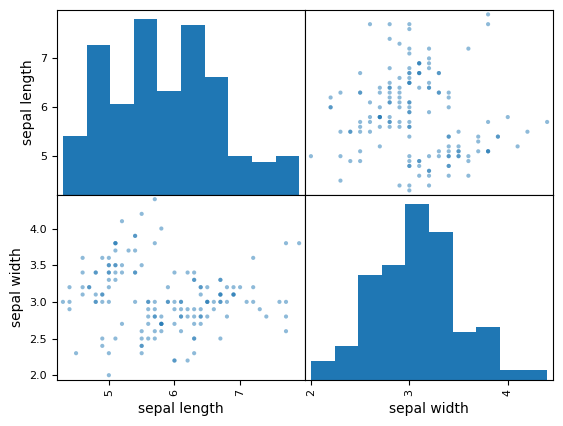

In [10]:
# scatter metrics
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(data[['sepal length', 'sepal width']])
plt.show()

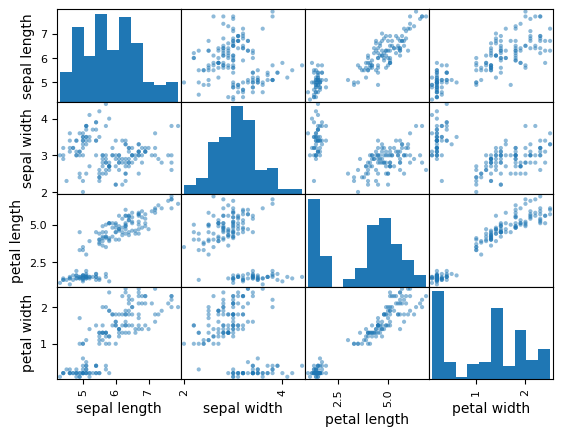

In [11]:
scatter_matrix(data[['sepal length', 'sepal width', 'petal length', 'petal width']])
plt.show()

In [12]:
# Hyphothesis testing: Comparing two grups
from scipy import stats

In [13]:
# 1-sample t-test: lihat seberapa beda population mean dari suatu mean hipotesa
stats.ttest_1samp(data['petal length'], 0)


Ttest_1sampResult(statistic=26.072598612367706, pvalue=2.1660171997461104e-57)

In [14]:
stats.ttest_1samp(data['petal length'], data['petal length'].mean())

Ttest_1sampResult(statistic=-1.5405215162991235e-14, pvalue=0.9999999999999878)

In [15]:
# 2-sample t-test: compare 2 datatset
vers = data[data['target'] == 'versicolor']['petal length']
virg = data[data['target'] == 'virginica']['petal length']
set_ = data[data['target'] == 'setosa']['petal length']
stats.ttest_ind(vers, virg)


Ttest_indResult(statistic=-12.603779441384985, pvalue=3.1788195478061495e-22)

In [16]:
stats.ttest_ind(vers, vers)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [17]:
stats.ttest_ind(vers, set_)


Ttest_indResult(statistic=39.492719391538095, pvalue=5.404910513441677e-62)

In [18]:
# Paired tests: Repeating measurement on the same individuals/objek
# 1. diferent time (pre-test dan post-test)
# 2. under two different condition (control --> experimental condition)
# 3. dst

# Commontly use
# 1. Statistical difference between two time points
# 2.                                    conditions
# 3.                                    measurements
# dst
vers1 = vers
import numpy as np
vers2 = np.array(list(vers))*2
vers3 = np.array(list(vers))+0.01

In [19]:
stats.ttest_rel(vers1, vers2)

Ttest_relResult(statistic=-64.10309683649905, pvalue=6.363605747461817e-49)

In [20]:
stats.ttest_rel(vers1, vers3)

Ttest_relResult(statistic=-inf, pvalue=0.0)

In [21]:
# Linear model
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3*x + 4*np.random.normal(size=x.shape)
y

array([-13.50261855, -20.86807829, -18.95479227, -19.55503238,
       -10.22258001, -21.31141795,  -3.54706873, -11.99219602,
        -6.09226467,  -6.78695519,   1.63790543, -10.87214179,
        -2.3423004 ,  -1.00990163,   6.64034093,  -0.71535454,
         4.57344506,   3.33067159,   8.58990762,  12.33126085])

In [22]:
data = pd.DataFrame({'x': x, 'y': y})
data

x          y
0  -5.000000 -13.502619
1  -4.473684 -20.868078
2  -3.947368 -18.954792
3  -3.421053 -19.555032
4  -2.894737 -10.222580
5  -2.368421 -21.311418
6  -1.842105  -3.547069
7  -1.315789 -11.992196
8  -0.789474  -6.092265
9  -0.263158  -6.786955
10  0.263158   1.637905
11  0.789474 -10.872142
12  1.315789  -2.342300
13  1.842105  -1.009902
14  2.368421   6.640341
15  2.894737  -0.715355
16  3.421053   4.573445
17  3.947368   3.330672
18  4.473684   8.589908
19  5.000000  12.331261

In [23]:
from statsmodels.formula.api import ols
model = ols('y ~ x', data).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           8.56e-08
Time:                        23:05:10   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.000      -7.710      -3.357
x              2.9369      0.341      8.604      0.000       2.220       3.654
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.956
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.322
Skew:                          -0.058   Prob(JB):                        0.851
Kurtosis:                       2.390   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
data

x          y
0  -5.000000 -13.502619
1  -4.473684 -20.868078
2  -3.947368 -18.954792
3  -3.421053 -19.555032
4  -2.894737 -10.222580
5  -2.368421 -21.311418
6  -1.842105  -3.547069
7  -1.315789 -11.992196
8  -0.789474  -6.092265
9  -0.263158  -6.786955
10  0.263158   1.637905
11  0.789474 -10.872142
12  1.315789  -2.342300
13  1.842105  -1.009902
14  2.368421   6.640341
15  2.894737  -0.715355
16  3.421053   4.573445
17  3.947368   3.330672
18  4.473684   8.589908
19  5.000000  12.331261

In [ ]:
import seaborn


data = get_df_with_string()

seaborn.pairplot(data, 
                vars=['sepal length', 'sepal width', 'petal length', 
                               'petal width'],
                kind='reg')
plt.show()

In [65]:
# Measure of centrar tendency
# 1. mean
# 2. mode
# 3. median
setosa = data[data['target'] == 'setosa']
versicolor = data[data['target'] == 'versicolor']
virginica = data[data['target'] == 'virginica']

In [67]:
data

sepal length  sepal width  petal length  petal width     target  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     target_int  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
145           2  
146           2  
147           2  
148           2  
149           2  

[150 rows x 6 columns]

In [68]:
# Measure of spread
# 1. Range: 
range_ = np.max(setosa['petal length'] - np.min(setosa['petal length']))
range_

0.8999999999999999

In [72]:
# 2. Percentil: data yang berada tepat dibawah suatu nilai persen
list_ = list(range(0, 100))
print(list_)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [73]:
np.percentile(list_, 25)

24.75

In [74]:
list_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
         46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 
         57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 
         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
         13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 
         24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 
         79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 
         90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

In [75]:
np.percentile(list_, 25)

24.75

In [76]:
# 3. Quartil
# 1. diurutkan
# 2. dipotong jadi 4 bagian
# 3. nilai kuartil ada pada potongan tersebut
# Q1: 25, Q2: 50, Q3: 75, Q4: 100
print(np.percentile(setosa['petal length'], 25))
print(np.percentile(setosa['petal length'], 50))
print(np.percentile(setosa['petal length'], 75))
print(np.percentile(setosa['petal length'], 100))

1.4
1.5
1.5750000000000002
1.9


In [77]:
# 4. Interquartil range (IQR)
# IQR = Q3-Q1
print(np.percentile(setosa['petal length'], 75) - np.percentile(setosa['petal length'], 25))


0.17500000000000027


In [78]:
# 5. Mean absolute deviation
# 1. hitung rerata
# 2. absolut(member-mean)
# 3. dijumlahkan
# 4. dibagi total data
data = [1, 2, 5, 6, 4, 3, 5]
mean = np.mean(data)
mad = 0
for d in data:
    mad = mad + abs(d - mean)
mad = mad/len(data)
mad

1.4693877551020407

In [80]:
# Variance: measure how far is data point form the mean variance (take square)
np.var(setosa['petal length'])

0.029555999999999995

In [81]:
# standard deviation
np.std(setosa['petal length'])

0.17191858538273283

In [82]:
# Probability density function (PDF)
data = get_df_with_string()
data


sepal length  sepal width  petal length  petal width     target  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     target_int  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
145           2  
146           2  
147           2  
148           2  
149           2  

[150 rows x 6 columns]

/Users/thomas/opt/miniconda3/envs/scraping_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/thomas/opt/miniconda3/envs/scraping_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/thomas/opt/miniconda3/envs/scraping_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

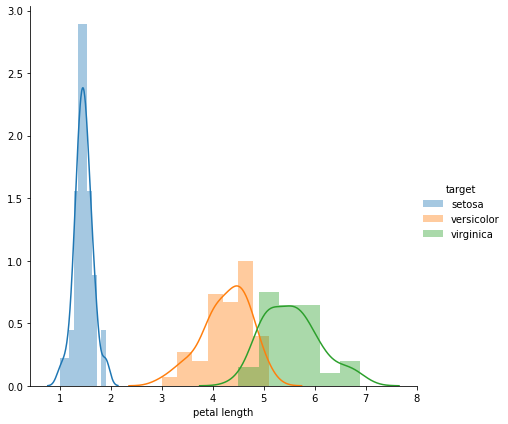

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.FacetGrid(
    data, hue='target', height=6).map(
    sns.distplot, 'petal length').add_legend()
plt.show()

/Users/thomas/opt/miniconda3/envs/scraping_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


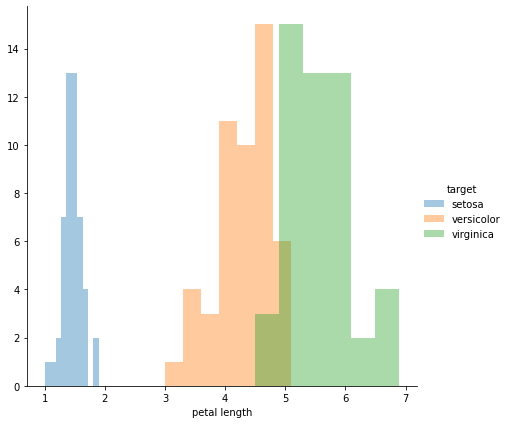

In [88]:
sns.FacetGrid(
    data, hue='target', height=6).map(
    sns.distplot, 'petal length', kde=False).add_legend()
plt.show()

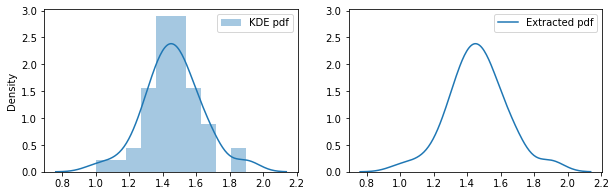

In [89]:
def get_dft(setosa, col):
    list_ = list(setosa[col])
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))
    x = np.array(list_)
    ax1 = sns.distplot(x, ax=axs[0], label='KDE pdf')
    fit  = ax1.get_lines()[0].get_data()
    xfit, yfit = fit[0], fit[1]

    
    ax1.legend()
    axs[1].plot(xfit, yfit, label='Extracted pdf')
    axs[1].set_ylim(ax1.get_ylim())
    plt.legend()
    return xfit, yfit

xfit, yfit = get_dft(setosa, 'petal length')

In [92]:
sum(yfit)

144.55895151455366

In [93]:
# Pearson correlation antara x dan y
# + 1 (terkolerasi linier positif)
# - 1 (terkolerasi liner negatif)
# 0 tidak terkolerasi linier

data.corr()

sepal length  sepal width  petal length  petal width  target_int
sepal length      1.000000    -0.117570      0.871754     0.817941    0.782561
sepal width      -0.117570     1.000000     -0.428440    -0.366126   -0.426658
petal length      0.871754    -0.428440      1.000000     0.962865    0.949035
petal width       0.817941    -0.366126      0.962865     1.000000    0.956547
target_int        0.782561    -0.426658      0.949035     0.956547    1.000000

In [94]:
def plot(data, x, y):
    plt.scatter(data[x], data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    return None


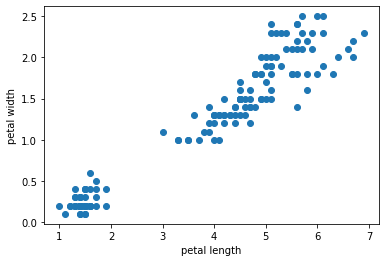

In [101]:
plot(data, 'petal length', 'petal width')


In [102]:
# compare two datasets
# 1. prove changes?
# 2. understand differences?
import datacompy
df1 = versicolor.reset_index()

In [103]:
df2 = virginica.reset_index()

In [106]:
compare = datacompy.Compare(df1, df2, join_columns='index')
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0       df1        7    50
1       df2        7    50

Column Summary
--------------

Number of columns in common: 7
Number of columns in df1 but not in df2: 0
Number of columns in df2 but not in df1: 0

Row Summary
-----------

Matched on: index
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 0
Number of rows in df1 but not in df2: 50
Number of rows in df2 but not in df1: 50

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 7
Total number of values which compare unequal: 0

Sample Rows Only in df1 (First 10 Columns)
------------------------------------------

    index  sepal length  sepal width  petal length  petal width      tar

In [108]:
compare.df2_unq_rows

index  sepal length  sepal width  petal length  petal width     target  \
50    100           6.3          3.3           6.0          2.5  virginica   
51    101           5.8          2.7           5.1          1.9  virginica   
52    102           7.1          3.0           5.9          2.1  virginica   
53    103           6.3          2.9           5.6          1.8  virginica   
54    104           6.5          3.0           5.8          2.2  virginica   
55    105           7.6          3.0           6.6          2.1  virginica   
56    106           4.9          2.5           4.5          1.7  virginica   
57    107           7.3          2.9           6.3          1.8  virginica   
58    108           6.7          2.5           5.8          1.8  virginica   
59    109           7.2          3.6           6.1          2.5  virginica   
60    110           6.5          3.2           5.1          2.0  virginica   
61    111           6.4          2.7           5.3          1.9  virginica   
62    112           6.8          3.0           5.5          2.1  virginica   
63    113           5.7          2.5           5.0          2.0  virginica   
64    114           5.8          2.8           5.1          2.4  virginica   
65    115           6.4          3.2           5.3          2.3  virginica   
66    116           6.5          3.0           5.5          1.8  virginica   
67    117           7.7          3.8           6.7          2.2  virginica   
68    118           7.7          2.6           6.9          2.3  virginica   
69    119           6.0          2.2           5.0          1.5  virginica   
70    120           6.9          3.2           5.7          2.3  virginica   
71    121           5.6          2.8           4.9          2.0  virginica   
72    122           7.7          2.8           6.7          2.0  virginica   
73    123           6.3          2.7           4.9          1.8  virginica   
74    124           6.7          3.3           5.7          2.1  virginica   
75    125           7.2          3.2           6.0          1.8  virginica   
76    126           6.2          2.8           4.8          1.8  virginica   
77    127           6.1          3.0           4.9          1.8  virginica   
78    128           6.4          2.8           5.6          2.1  virginica   
79    129           7.2          3.0           5.8          1.6  virginica   
80    130           7.4          2.8           6.1          1.9  virginica   
81    131           7.9          3.8           6.4          2.0  virginica   
82    132           6.4          2.8           5.6          2.2  virginica   
83    133           6.3          2.8           5.1          1.5  virginica   
84    134           6.1          2.6           5.6          1.4  virginica   
85    135           7.7          3.0           6.1          2.3  virginica   
86    136           6.3          3.4           5.6          2.4  virginica   
87    137           6.4          3.1           5.5          1.8  virginica   
88    138           6.0          3.0           4.8          1.8  virginica   
89    139           6.9          3.1           5.4          2.1  virginica   
90    140           6.7          3.1           5.6          2.4  virginica   
91    141           6.9          3.1           5.1          2.3  virginica   
92    142           5.8          2.7           5.1          1.9  virginica   
93    143           6.8          3.2           5.9          2.3  virginica   
94    144           6.7          3.3           5.7          2.5  virginica   
95    145           6.7          3.0           5.2          2.3  virginica   
96    146           6.3          2.5           5.0          1.9  virginica   
97    147           6.5          3.0           5.2          2.0  virginica   
98    148           6.2          3.4           5.4          2.3  virginica   
99    149           5.9          3.0           5.1          1.8  virginica   

    target_int  
50      

In [109]:
compare.intersect_rows

Empty DataFrame
Columns: [index, sepal length_df1, sepal width_df1, petal length_df1, petal width_df1, target_df1, target_int_df1, sepal length_df2, sepal width_df2, petal length_df2, petal width_df2, target_df2, target_int_df2, _merge, target_int_match, sepal length_match, target_match, petal length_match, sepal width_match, petal width_match]
Index: []

In [110]:
# Pvalue
# https://www.investopedia.com/terms/p/p-value.asp